In [185]:
import os
import json
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

def dictlist(test, label):
    for i in range(len(test['images'])):
        file_name = test['images'][i]['file_name']
        age = boneage[i,2]
        gender = int(boneage[i,1])
        w = test['images'][i]['width']
        h = test['images'][i]['height']
        bbox = test['annotations'][i]['bbox']
        label.append({'name': file_name, 'age': age, 'gender':gender, 'width': w, 'height': h, 'bbox':bbox})
    return label

def dictlist_sort(label):
    label.sort(key = lambda i: float(i['name'].split('.')[0]))
    return label

# # original rsna annotation
# path_anno = '../RSNA_Annotations/BONEAGE';
# train = pd.read_csv(os.path.join(path_anno,'boneage_train.csv'))
# val = pd.read_csv(os.path.join(path_anno,'boneage_val.csv'))
# test = pd.read_csv(os.path.join(path_anno, 'bonage_test.csv'))

# # txt 
# aimg = np.loadtxt('./aimg.txt',dtype='<U32')
# alabel = np.loadtxt('./alabel.txt',dtype='<U32')
# baa = np.vstack((aimg[:,1],alabel[:,1])).T
# np.save('baa.npy',baa)

# columbia rsna annotation
###################################################################################
path_anno = '../RSNA_Anno_c'
path_img = '../images'

# boneage
train = pd.read_csv(os.path.join(path_anno,'RSNA_Boneage_Training.csv')).values
val = pd.read_csv(os.path.join(path_anno,'RSNA_Boneage_Validation.csv')).values
test = pd.read_csv(os.path.join(path_anno, 'RSNA_Gender_Testing.csv')).values
boneage = np.vstack((train,val))


# annotations
# with open(os.path.join(path_anno, 'RSNA_Anatomical_ROIs_Testing.json'), 'r') as f:
#     test = json.load(f)
with open(os.path.join(path_anno, 'RSNA_Anatomical_ROIs_Training.json'), 'r') as f:
    train = json.load(f)
with open(os.path.join(path_anno, 'RSNA_Anatomical_ROIs_Validation.json'), 'r') as f:
    val = json.load(f)

label = []
# label = dictlist(test, label)
label = dictlist(val, label)
label = dictlist(train, label)
label = dictlist_sort(label)

# concatenate
for i in range(len(label)):
    label[i]['age'] = boneage[i, 2]
    label[i]['gender'] = int(boneage[i, 1])


jslabel = json.dumps(label)
f = open('label.json', 'w')
f.write(jslabel)
f.close()


W = np.zeros(len(label))
H = np.zeros(len(label))
age = np.zeros(len(label))
bbox = np.zeros((len(label), 4))
for i in range(len(label)):
    W[i] = label[i]['width']
    H[i] = label[i]['height']
    bbox[i,:] = label[i]['bbox']
    age[i] = label[i]['age']

(array([   53,   402,  1780,  2508,  2522,  2554,  2622,  2627,  2833,
         2853,  5658,  6213, 12434, 12766]),)

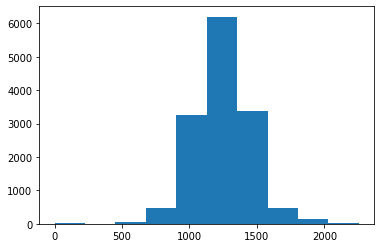

In [199]:
# plt.hist(W)
# plt.hist(H)
t=bbox[:,3]
# t[53]=2500
plt.hist(t,)
np.where(t==0)

# plt.hist(age)
# plt.hist(age)

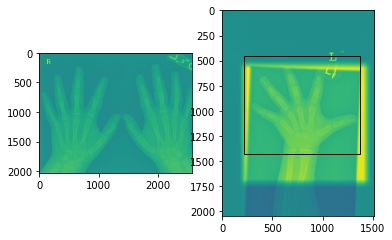

In [172]:
fig = plt.figure()
for k in range(53,55):
    ax = fig.add_subplot(1,2,k-52)
    img = plt.imread(os.path.join(path_img, label[k]['name']))
    plt.imshow(img)
    rect = plt.Rectangle(bbox[k,0:2],bbox[k,2],bbox[k,3],fill=False)
    ax.add_patch(rect)
plt.show()

In [171]:
k

53

In [169]:
range(53,54)

range(53, 54)